In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [21]:
x,y=make_moons(n_samples=1000,noise=0.2)

In [22]:
df = {'x1':x[:,0],'x2': x[:,1], "y":y}

In [23]:
dataset = pd.DataFrame(df)

In [24]:
dataset

,x1,x2,y
0,0.813137,0.713544,0
1,1.662307,0.015809,1
2,0.110998,0.824568,1
3,0.564979,0.784390,0
4,2.254413,0.167775,1
...,...,...,...
995,1.449719,-0.409804,1
996,-0.864660,0.512996,0
997,-0.520843,1.026421,0
998,-0.320667,0.963578,0


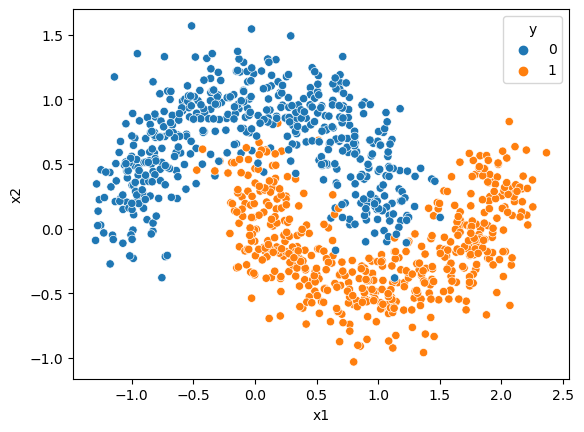

In [25]:
import seaborn as sns
sns.scatterplot(x='x1',y='x2',data=dataset,hue='y')
plt.show()

In [26]:
x_a = dataset.iloc[:,:-1]
y_a = dataset['y']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [31]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(100.0, 97.5)

In [32]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100, sv.score(x_test,y_test)*100

(96.875, 98.5)

In [33]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100, gnb.score(x_test,y_test)*100

(86.5, 88.0)

In [35]:
from sklearn.ensemble import VotingClassifier

In [37]:
li = [('dt1',DecisionTreeClassifier()),('sv1',SVC()),('gnb1',GaussianNB())]

In [45]:
vd = VotingClassifier(li)
vd.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [46]:
vd.score(x_train,y_train)*100, vd.score(x_test,y_test)*100

(97.75, 98.0)

In [50]:
prd = {'dt':dt.predict(x_test),'svm':sv.predict(x_test),'gnb':gnb.predict(x_test),'vd':vd.predict(x_test)}

In [51]:
pd.DataFrame(prd)

,dt,svm,gnb,vd
0,1,1,1,1
1,1,1,1,1
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
195,0,0,0,0
196,0,0,0,0
197,1,1,1,1
198,0,0,1,0
